# Demo of ASR with Pretrained Models
## Demo by Ye Kyaw Thu, Visiting Professor, NECTEC, Thailand
## Date: 5 April 2023, at SIIT Univ.
## Original Notebook took from CMU 2022 Tutorial


In [1]:
!pip install -q espnet_model_zoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.7/218.7 kB 21.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements

In [2]:
#@title Choose English ASR model { run: "auto" }

lang = 'en'
fs = 16000 #@param {type:"integer"}
tag = 'Shinji Watanabe/spgispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave' #@param ["Shinji Watanabe/spgispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave", "kamo-naoyuki/librispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_bpe5000_scheduler_confwarmup_steps40000_optim_conflr0.0025_sp_valid.acc.ave"] {type:"string"}

In [ ]:
#@title Choose Japanese ASR model { run: "auto" }

lang = 'ja'
fs = 16000 #@param {type:"integer"}
tag = 'Shinji Watanabe/laborotv_asr_train_asr_conformer2_latest33_raw_char_sp_valid.acc.ave' #@param ["Shinji Watanabe/laborotv_asr_train_asr_conformer2_latest33_raw_char_sp_valid.acc.ave"] {type:"string"}

In [ ]:
#@title Choose Mandrain ASR model { run: "auto" }

lang = 'zh'
fs = 16000 #@param {type:"integer"}
tag = 'Emiru Tsunoo/aishell_asr_train_asr_streaming_transformer_raw_zh_char_sp_valid.acc.ave' #@param ["	Emiru Tsunoo/aishell_asr_train_asr_streaming_transformer_raw_zh_char_sp_valid.acc.ave"] {type:"string"}

In [ ]:
#@title Choose Multilingual ASR model { run: "auto" }

lang = 'multilingual'
fs = 16000 #@param {type:"integer"}
tag = 'ftshijt/open_li52_asr_train_asr_raw_bpe7000_valid.acc.ave_10best' #@param ["	ftshijt/open_li52_asr_train_asr_raw_bpe7000_valid.acc.ave_10best"] {type:"string"}

In [3]:
!pip uninstall -y typeguard

Found existing installation: typeguard 2.13.3
Uninstalling typeguard-2.13.3:
  Successfully uninstalled typeguard-2.13.3


In [4]:
#!pip install typeguard==1.2.1
!pip install typeguard==2.13.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)


In [5]:
#pip install numpy==1.23.5

In [6]:
import time
import torch
import string
from espnet_model_zoo.downloader import ModelDownloader
from espnet2.bin.asr_inference import Speech2Text


d = ModelDownloader()
# It may takes a while to download and build models
speech2text = Speech2Text(
    **d.download_and_unpack(tag),
    device="cuda",
    minlenratio=0.0,
    maxlenratio=0.0,
    ctc_weight=0.3,
    beam_size=10,
    batch_size=0,
    nbest=1
)

def text_normalizer(text):
    text = text.upper()
    return text.translate(str.maketrans('', '', string.punctuation))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
https://zenodo.org/record/4585558/files/asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave.zip?download=1: 100%|██████████| 772M/772M [20:25<00:00, 660kB/s] 


fatal: destination path 'NLP_speech' already exists and is not an empty directory.


/usr/local/lib/python3.10/dist-packages/torch/functional.py:641: UserWarning: stft with return_complex=False is deprecated. In a future pytorch release, stft will return complex tensors for all inputs, and return_complex=False will raise an error.
Note: you can still call torch.view_as_real on the complex output to recover the old return format. (Triggered internally at ../aten/src/ATen/native/SpectralOps.cpp:862.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


Input Speech: ESPNet_asr_egs/en/1.wav


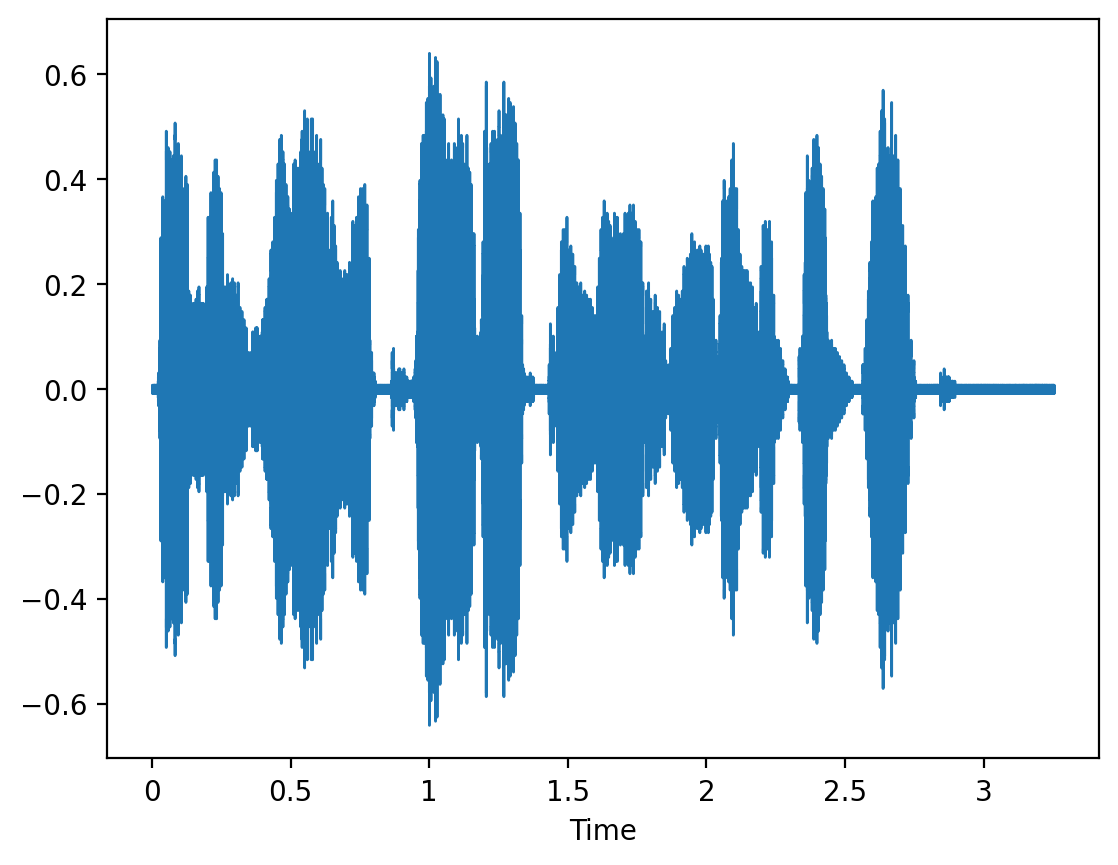

Reference text: IM ENJOYING A QUIET AFTERNOON READING A GOOD BOOK
ASR hypothesis: IM ENJOYING A QUIET AFTERNOON READING A GOOD BOOK
**************************************************
Input Speech: ESPNet_asr_egs/en/2.wav


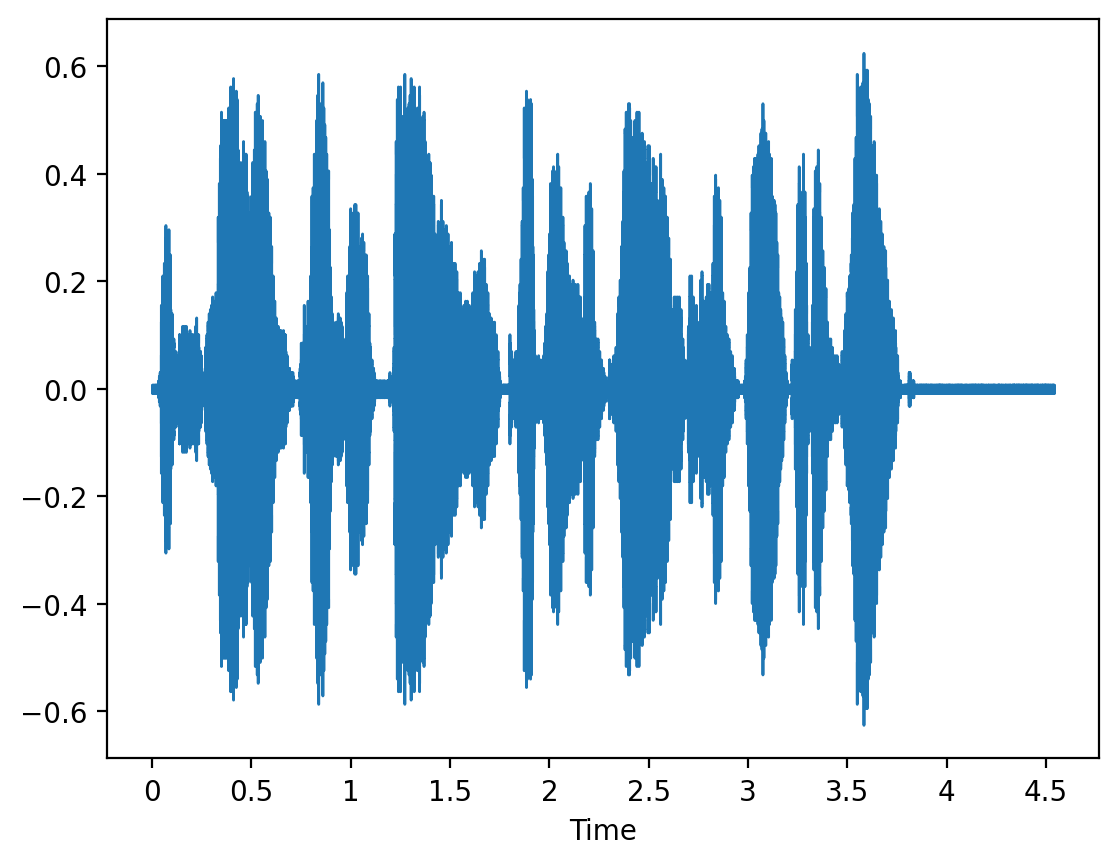

Reference text: THE SNOW IS GENTLY FALLING AND COVERING THE GROUND IN A BLANKET OF WHITE
ASR hypothesis: THE SNOW IS GENTLY FALLING AND COVERING THE GROUND IN A BLANKET OF LIGHT
**************************************************
Input Speech: ESPNet_asr_egs/en/3.wav


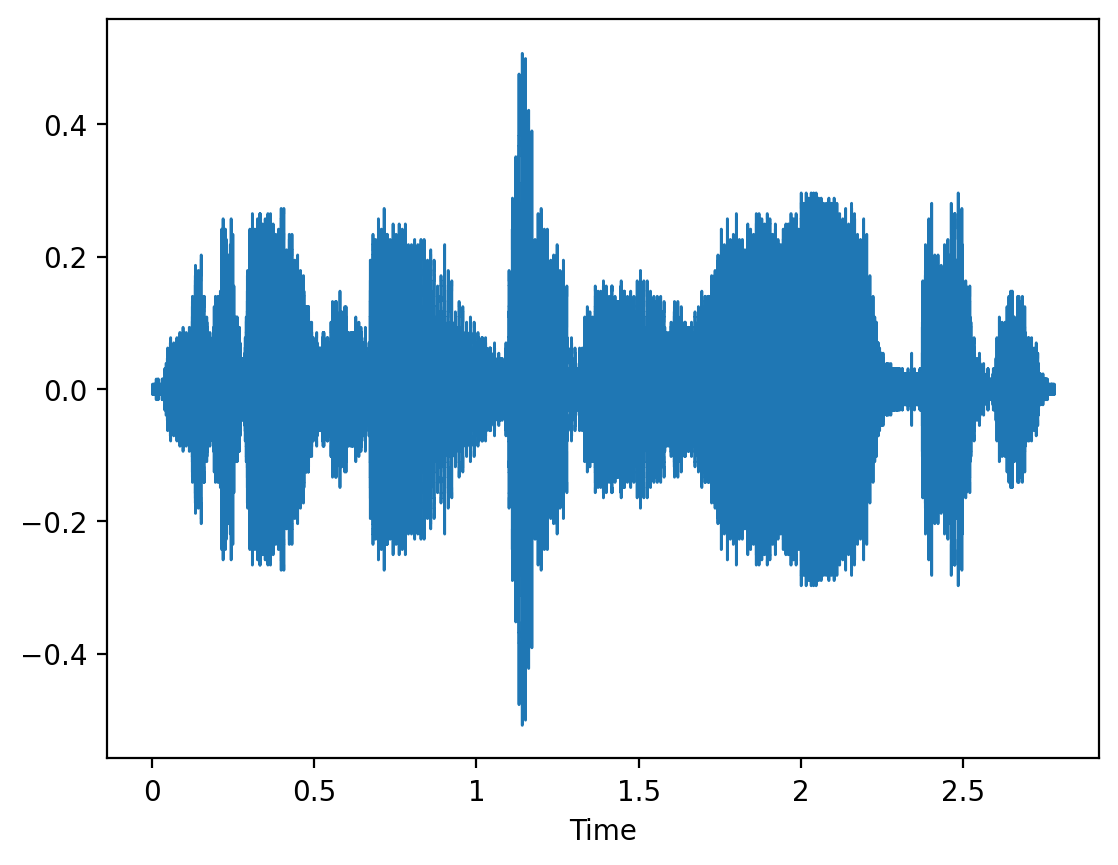

Reference text: THE SUN IS SHINING BRIGHTLY AND WARMING MY FACE
ASR hypothesis: THE SUN IS SHINING BRIGHTLY AND WARMING MY FACE
**************************************************
Input Speech: ESPNet_asr_egs/en/4.wav


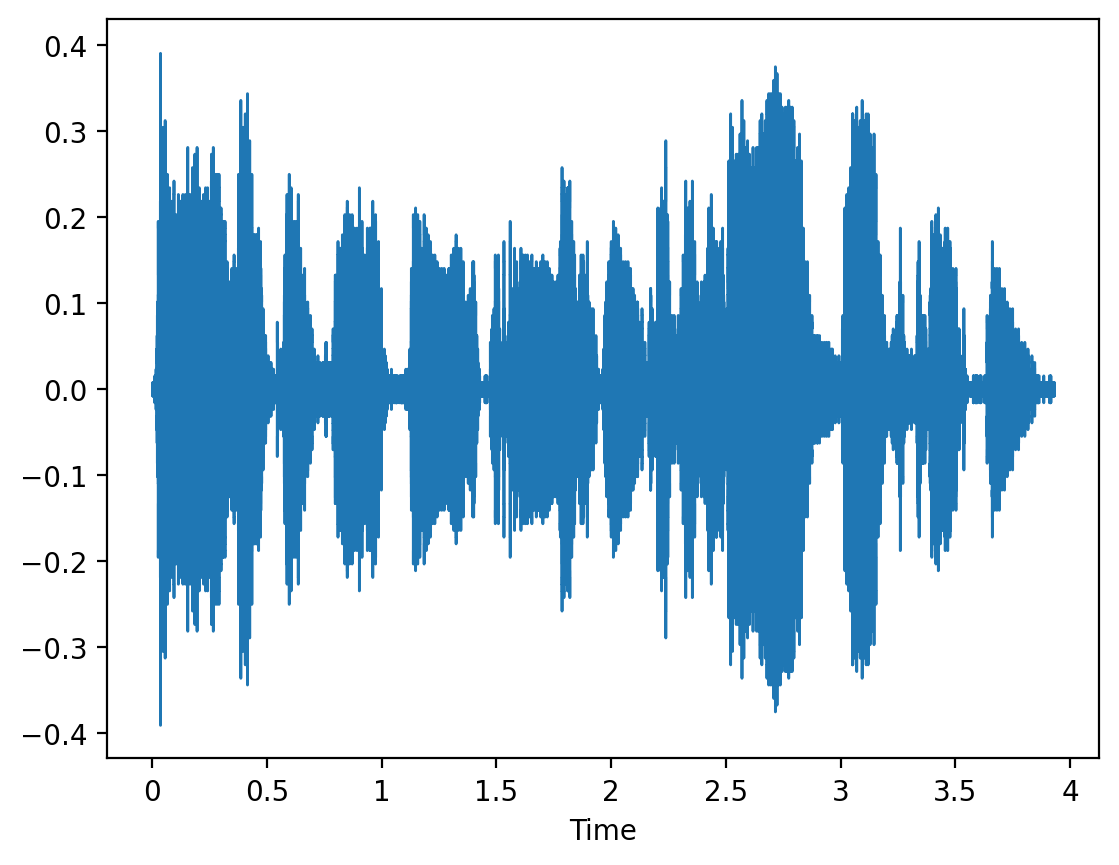

Reference text: IM HIKING THROUGH THE FOREST AND LISTENING TO THE SOUND OF BIRDS CHIRPING
ASR hypothesis: IM CYCLING THROUGH THE FOREST AND LISTENING TO THE SOUND OF BIRDS CHARTING
**************************************************
Input Speech: ESPNet_asr_egs/en/5.wav


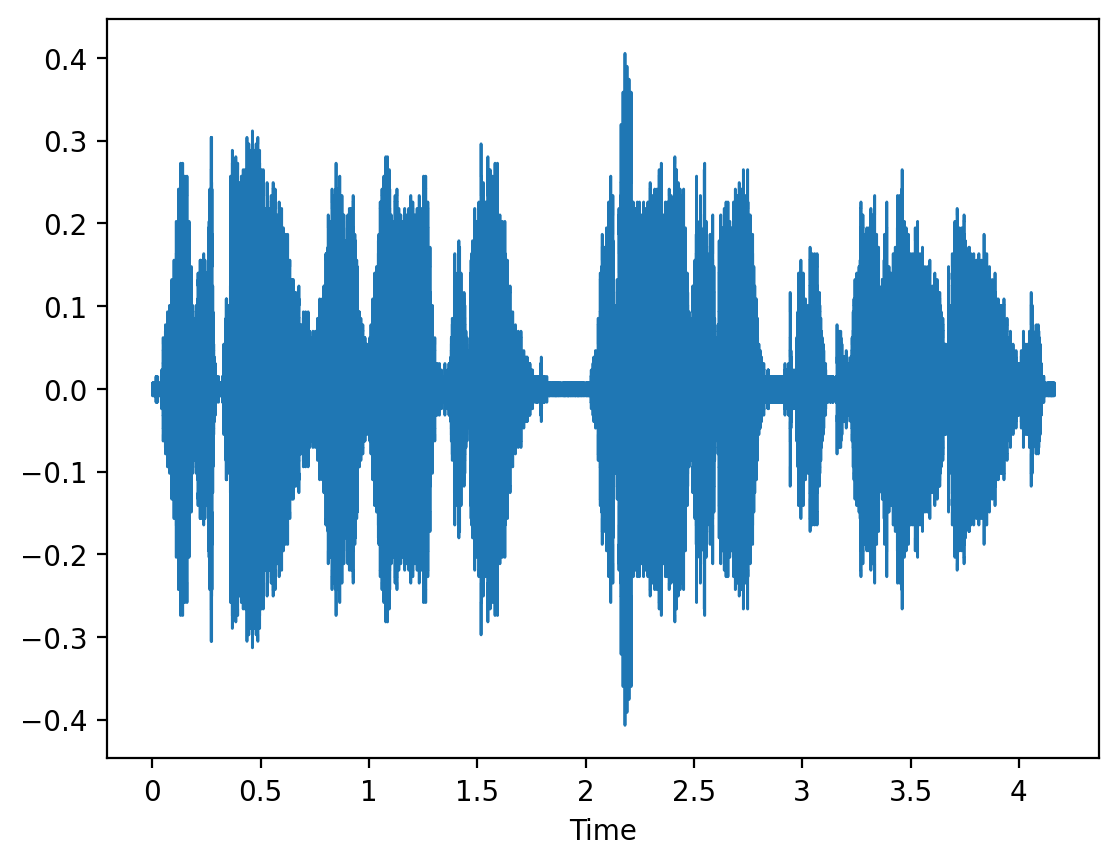

Reference text: THE STORM IS RAGING OUTSIDE BUT IM SAFE AND COZY INDOORS
ASR hypothesis: THE STORM IS RACING OUTSIDE BUT IM SAFE AND ITS THE INDOORS
**************************************************
Input Speech: ESPNet_asr_egs/en/6.wav


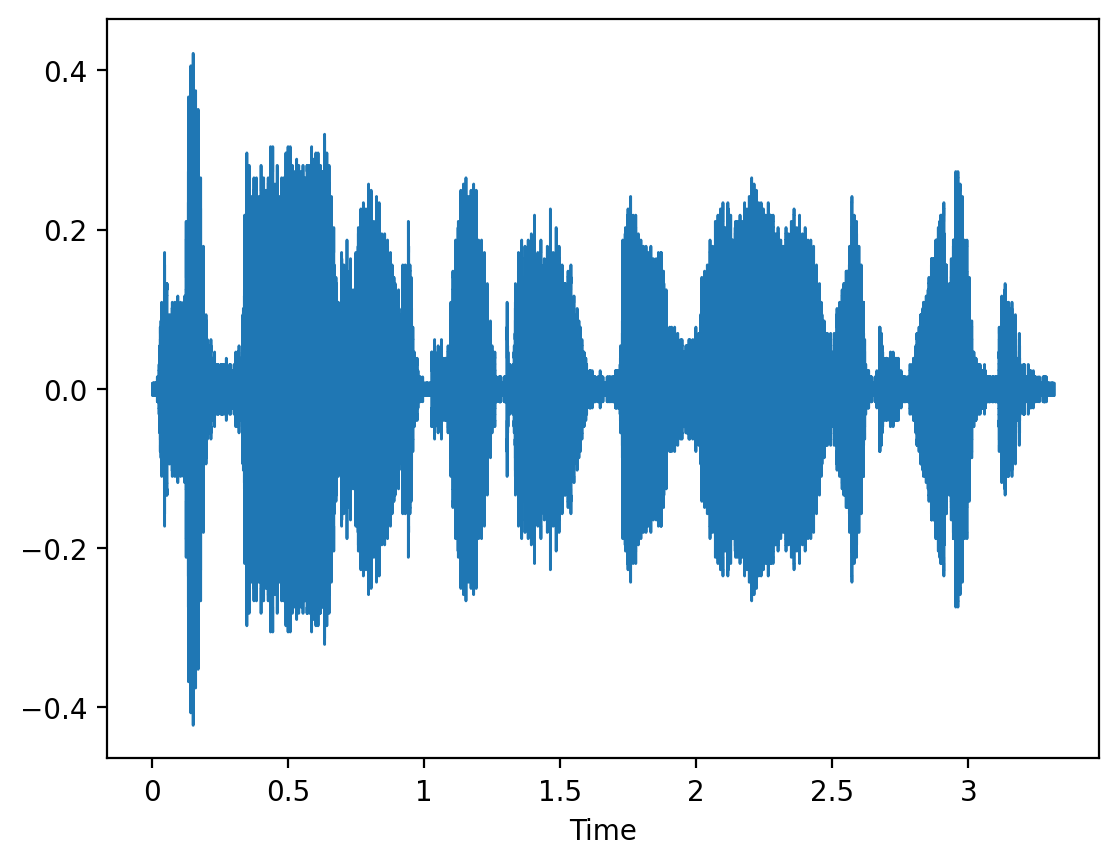

Reference text: THE FLOWERS IN THE PARK ARE IN FULL BLOOM AND LOOK BEAUTIFUL
ASR hypothesis: THE FLOWERS AND THE PARKER AND FULL BLOOM AND THE BEAUTIFUL
**************************************************
Input Speech: ESPNet_asr_egs/en/7.wav


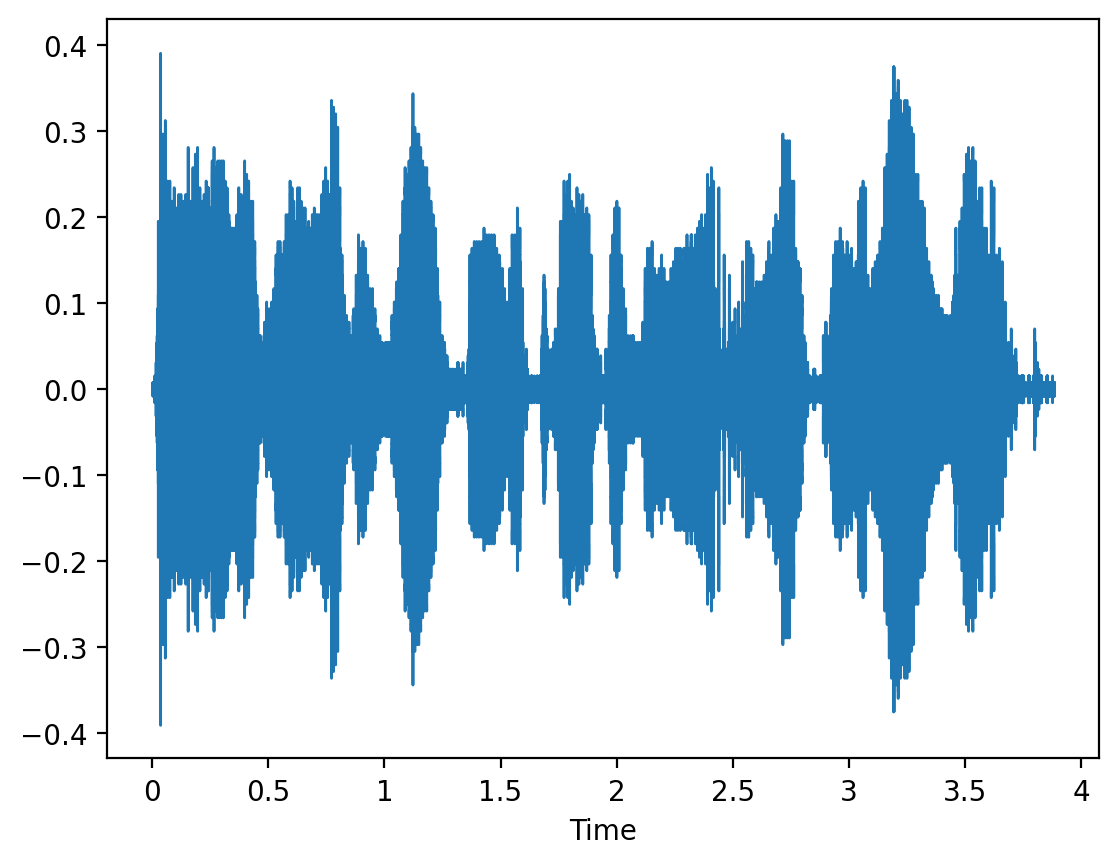

Reference text: IM ENJOYING THE VIEW FROM THE TOP OF THE MOUNTAIN AFTER A LONG HIKE
ASR hypothesis: IM ENJOYING THE VIEW FROM THE TOP OF THE MOUNTAIN AFTER A LONG TIME
**************************************************
Input Speech: ESPNet_asr_egs/en/8.wav


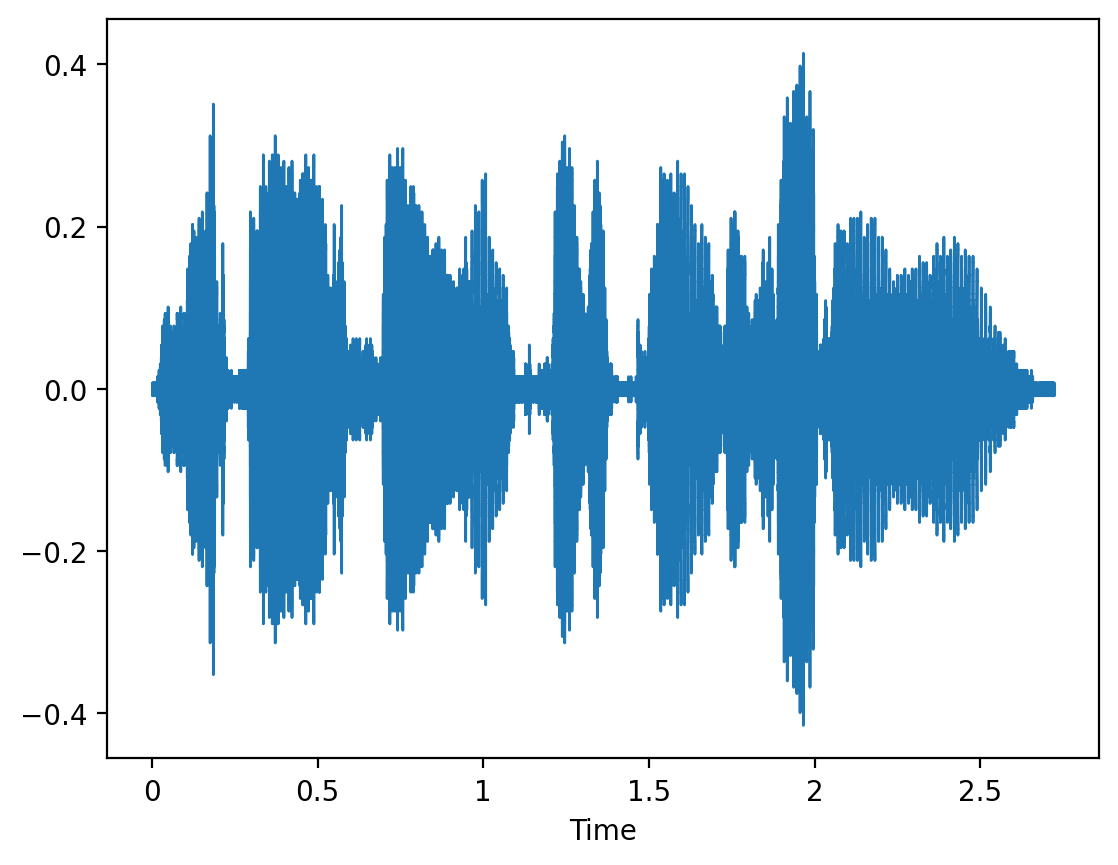

Reference text: THE AIR IS COOL AND CRISP ON THIS AUTUMN MORNING
ASR hypothesis: THE ERICSSON COOL AND CRYSPONS THIS AUTUMN
**************************************************
Input Speech: ESPNet_asr_egs/en/9.wav


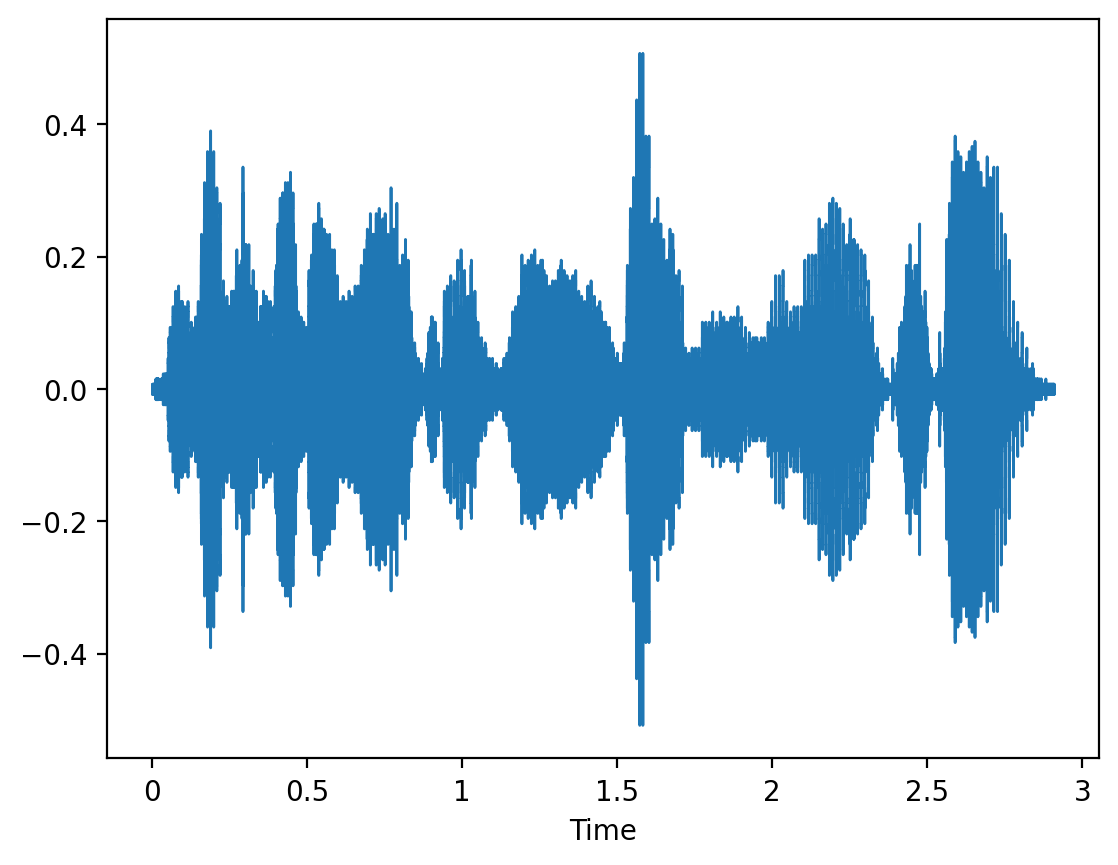

Reference text: THE CITY LIGHTS ARE GLOWING BRIGHTLY IN THE NIGHT SKY
ASR hypothesis: THE CITYWIDES ARE GROWING IN THE NINTH SKY
**************************************************
Input Speech: ESPNet_asr_egs/en/10.wav


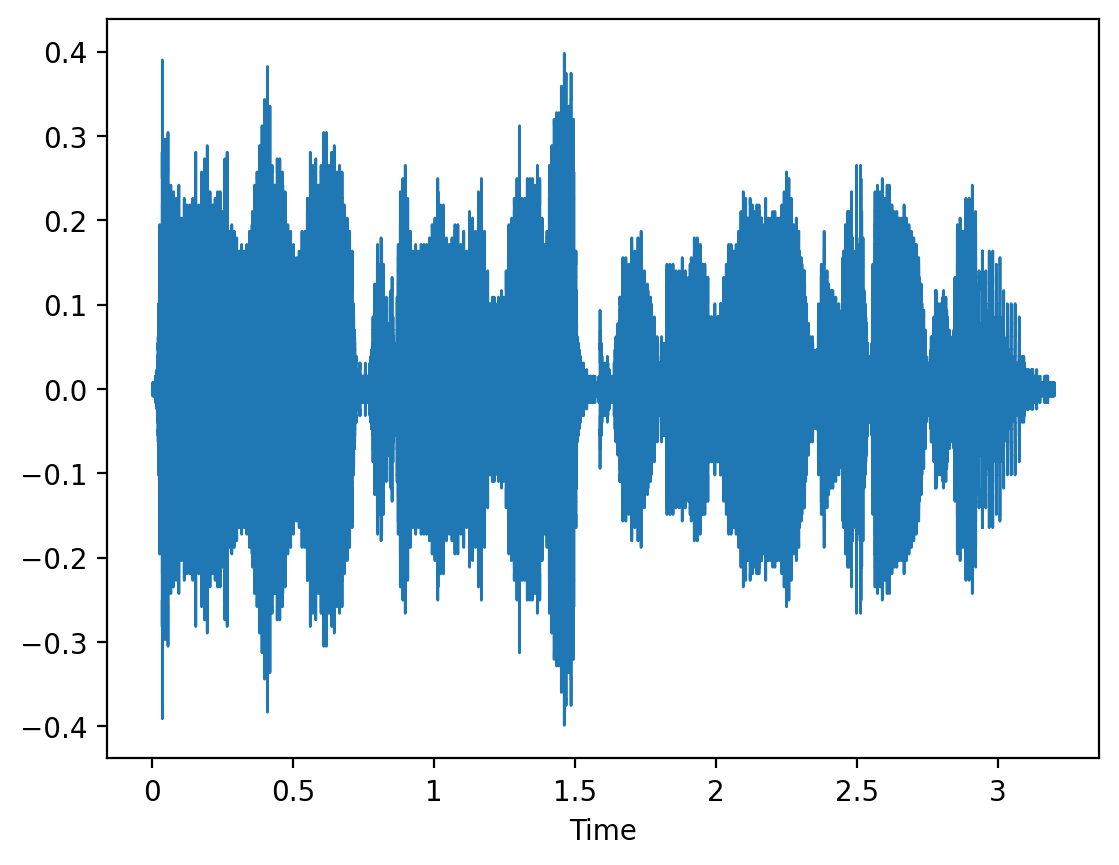

Reference text: IM RELAXING IN THE HAMMOCK AND ENJOYING THE SUNSHINE
ASR hypothesis: IM RELAXING IN THE HEMOG AND ENJOYING THE SUNSHINE
**************************************************
Input Speech: ESPNet_asr_egs/en/11.wav


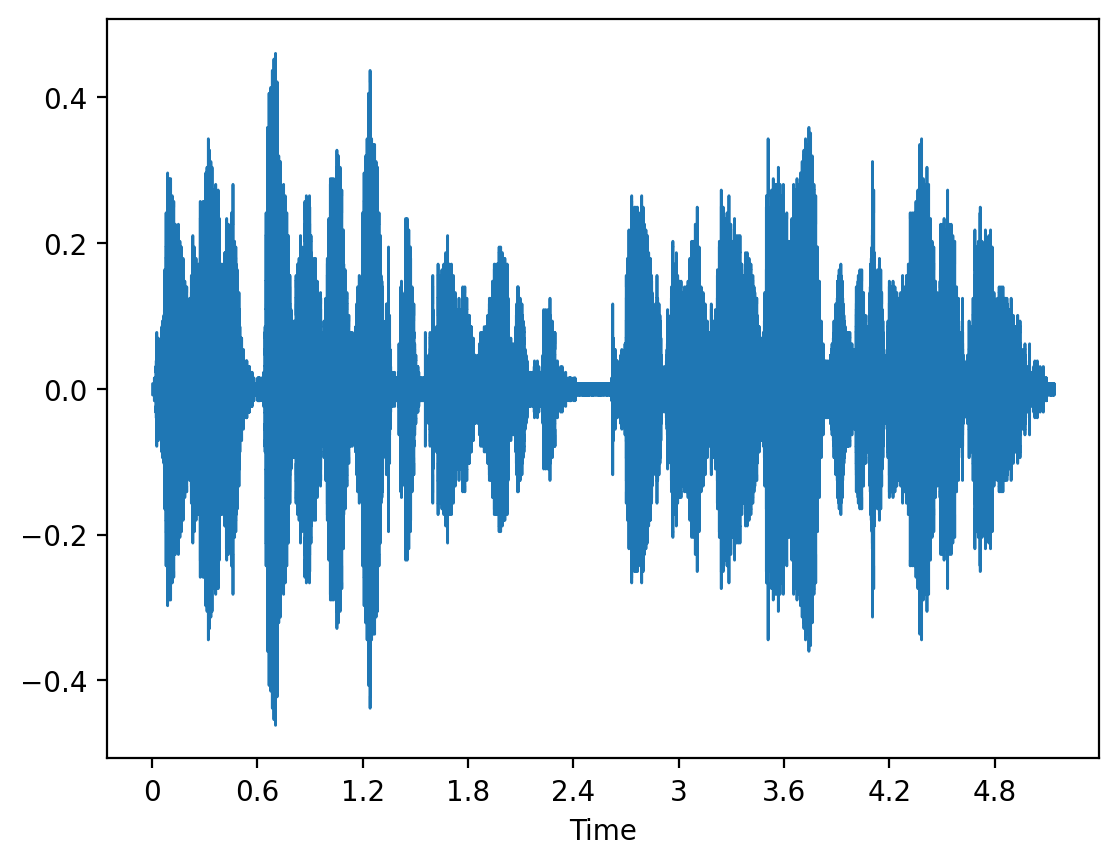

Reference text: THE WATERFALL IS MAJESTIC AND BEAUTIFUL CASTING A RAINBOW OVER THE SURROUNDING AREA
ASR hypothesis: THE WATERFALL IS MAGNESTIC AND BEAUTIFUL CASTING A RAINBOW OVER THE SURROUNDING AREA
**************************************************
Input Speech: ESPNet_asr_egs/en/12.wav


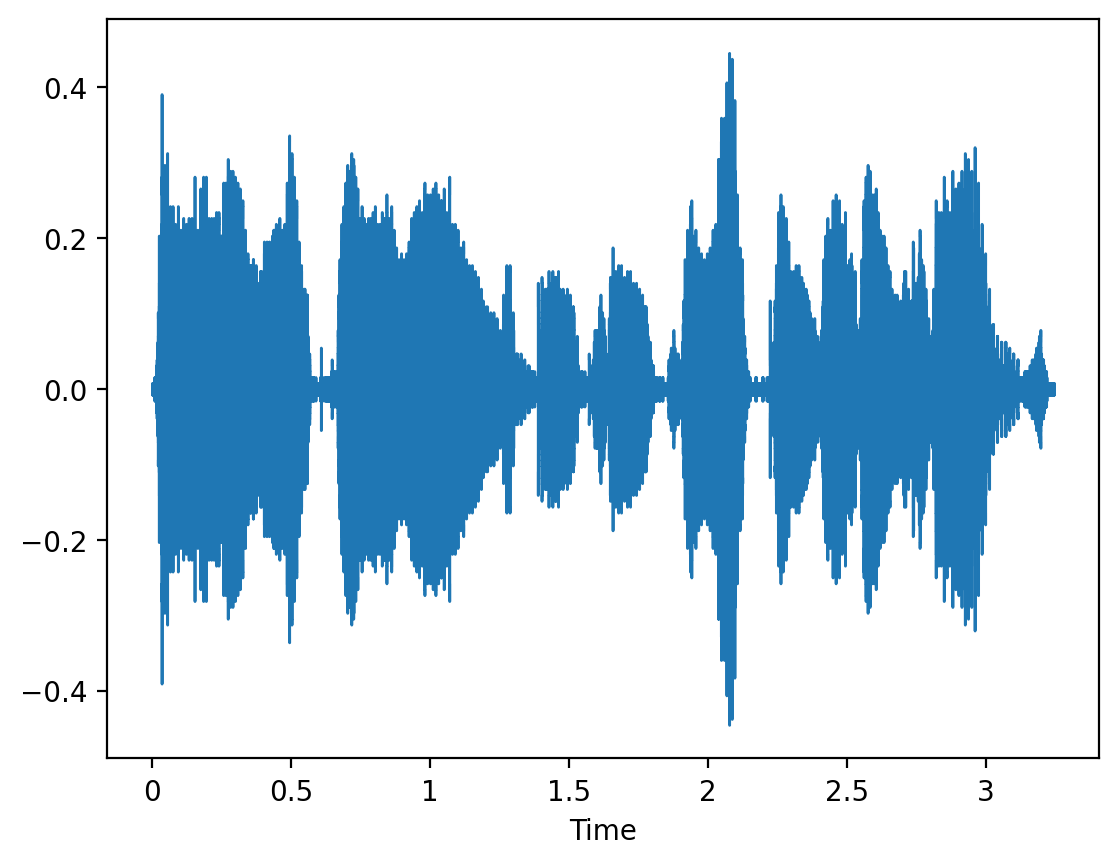

Reference text: IM WALKING ALONG THE BEACH AND COLLECTING SEASHELLS
ASR hypothesis: I AM WALKING ALONG THE BEACH AND COLLECTING SEA SHELVES
**************************************************
Input Speech: ESPNet_asr_egs/en/13.wav


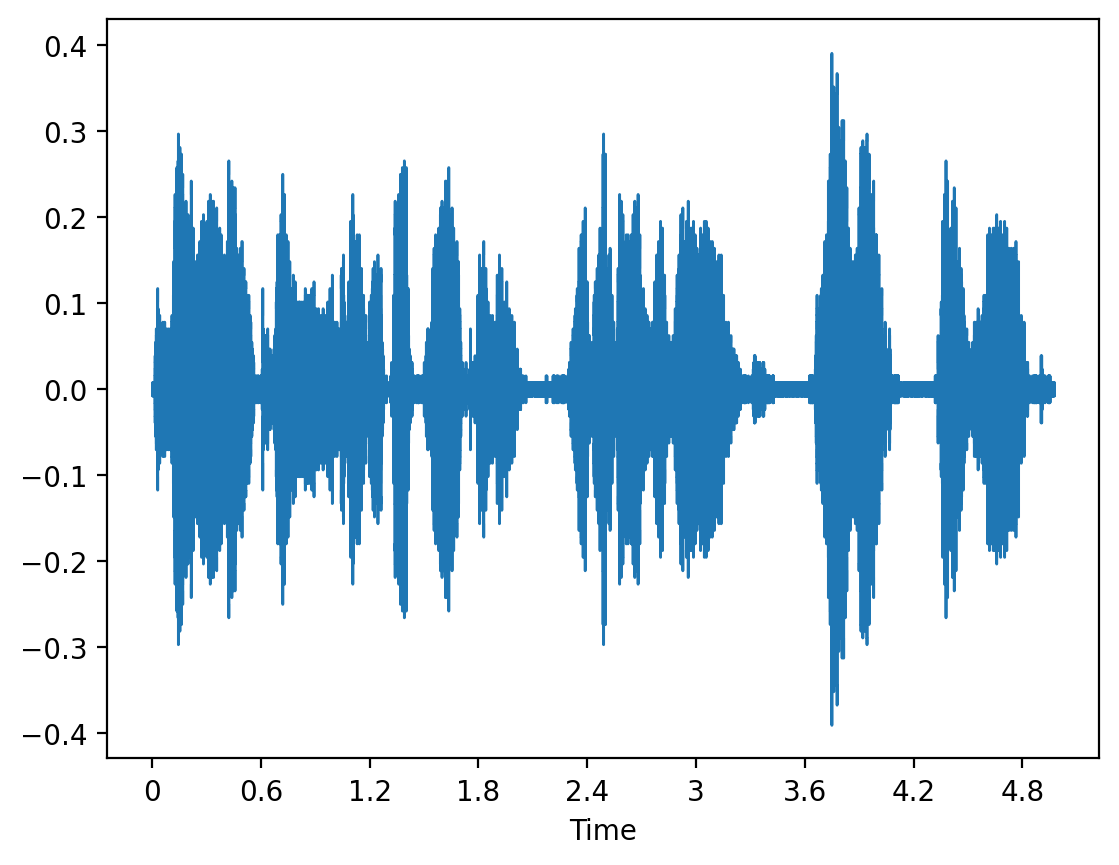

Reference text: THE AUTUMN COLORS ARE SPECTACULAR WITH SHADES OF ORANGE YELLOW AND RED
ASR hypothesis: THE AUTUMN COLORS ARE SPECTACULAR WITH SHADES OF ORANGE YELLOW AND RED
**************************************************
Input Speech: ESPNet_asr_egs/en/14.wav


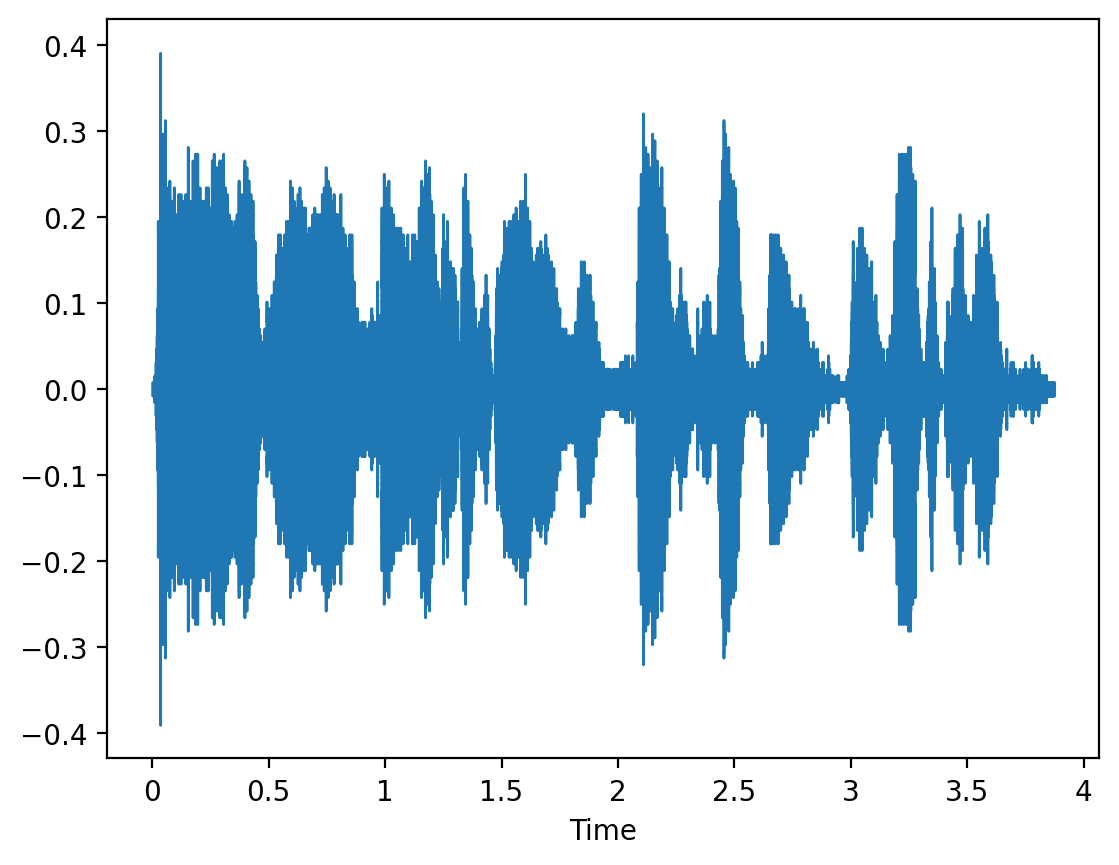

Reference text: IM ENJOYING A DELICIOUS MEAL OF FRESH SEAFOOD AND VEGETABLES
ASR hypothesis: I AM ENJOYING A DELICIOUS MEAL OF FRESH SEAFOOD AND VEGETABLE
**************************************************
Input Speech: ESPNet_asr_egs/en/15.wav


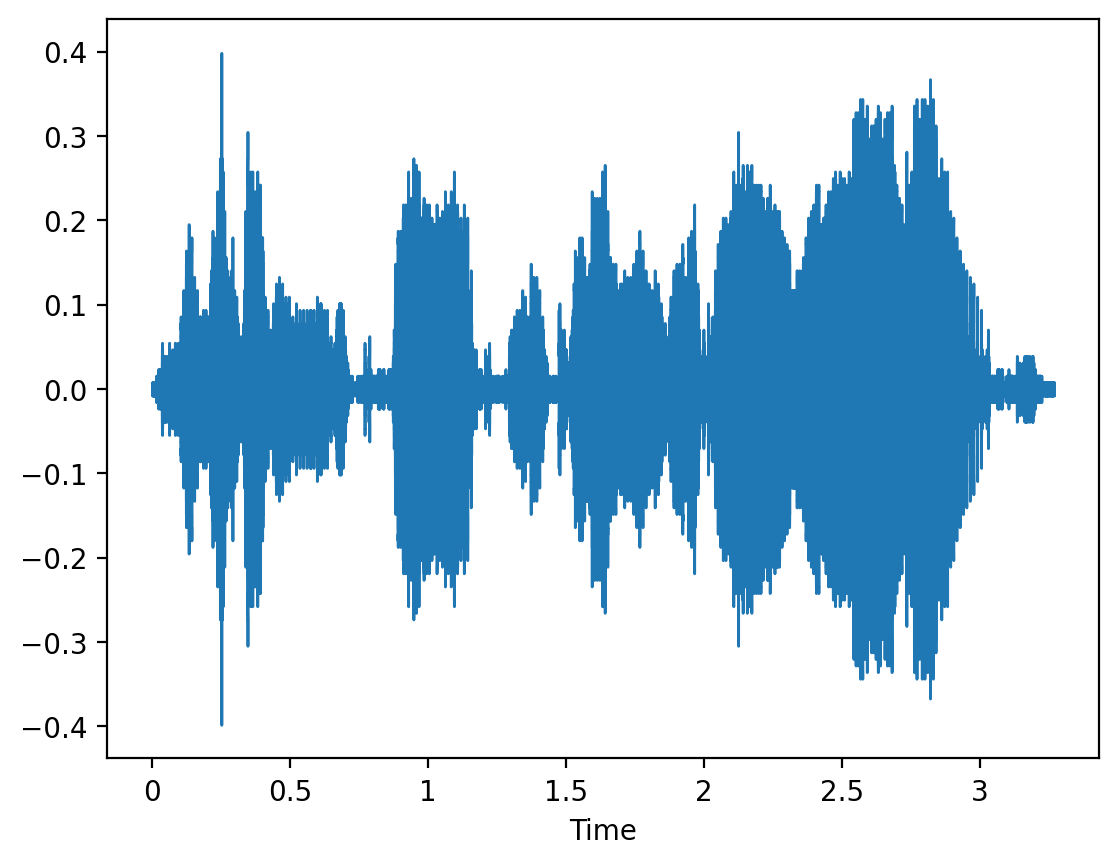

Reference text: THE CITY IS QUIET AND CALM IN THE EARLY MORNING HOURS
ASR hypothesis: THE CITY IS QUIET AND CALM IN THE EARLY MORNING HOURS
**************************************************
Input Speech: ESPNet_asr_egs/en/16.wav


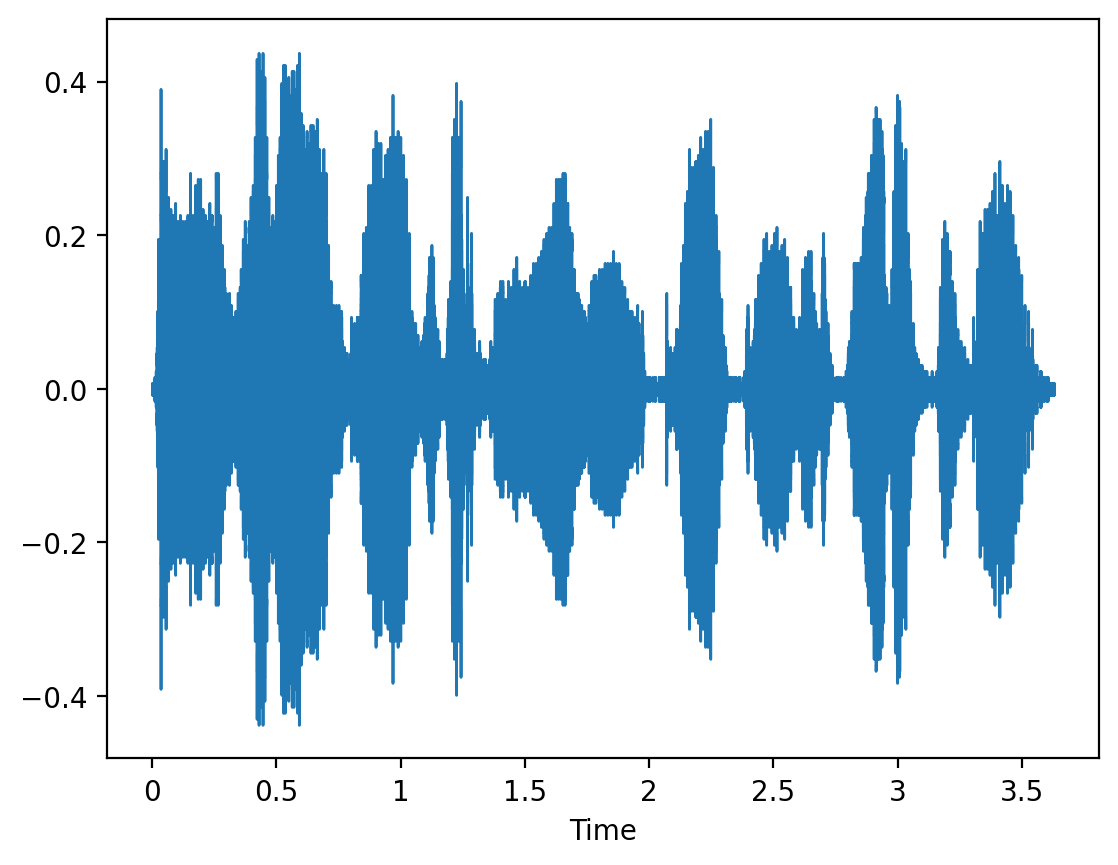

Reference text: IM HAVING A BLAST AT THE AMUSEMENT PARK ON THIS BEAUTIFUL DAY
ASR hypothesis: I AM HAVING A BLAST AT THE AMUSEMENT PARK ON THIS BEAUTIFUL DAY
**************************************************
Input Speech: ESPNet_asr_egs/en/17.wav


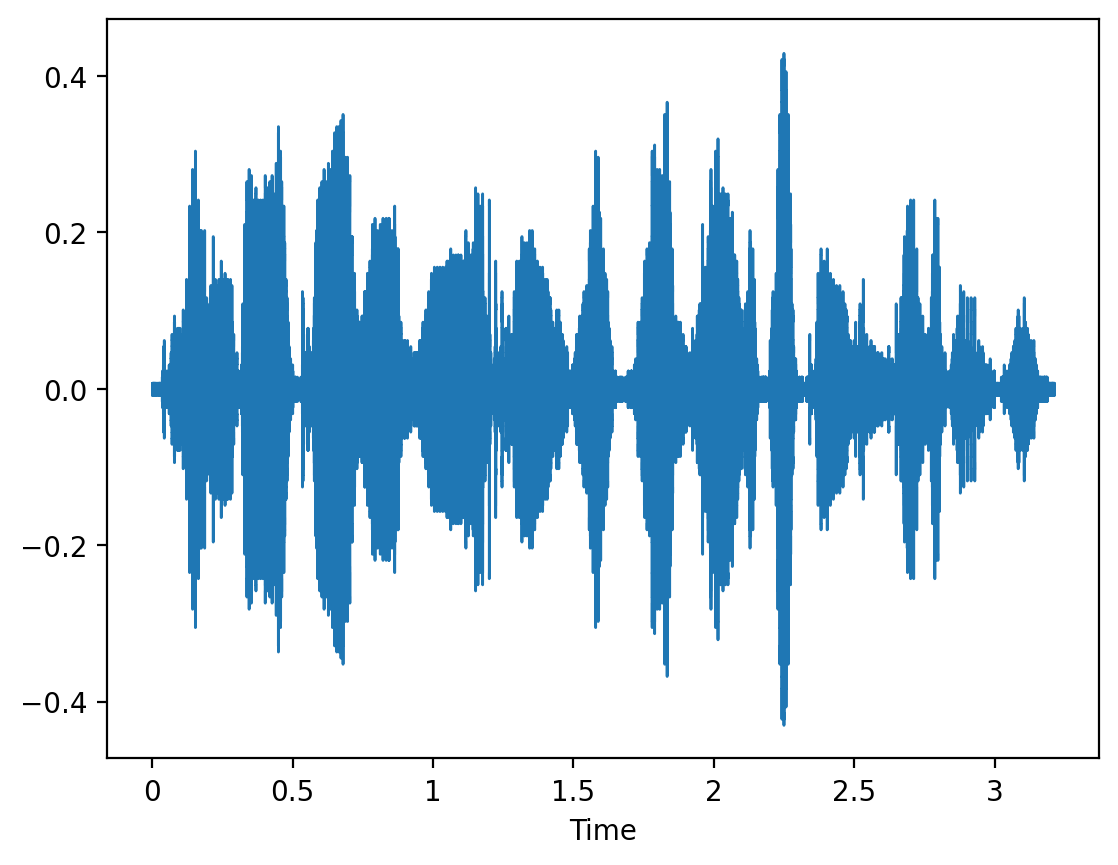

Reference text: THE SNOWCOVERED MOUNTAINS LOOK MAJESTIC IN THE DISTANCE
ASR hypothesis: THE SNOWCOVERED MOUNTAINS THE MAJESTIC AND THE DISTANCE
**************************************************
Input Speech: ESPNet_asr_egs/en/18.wav


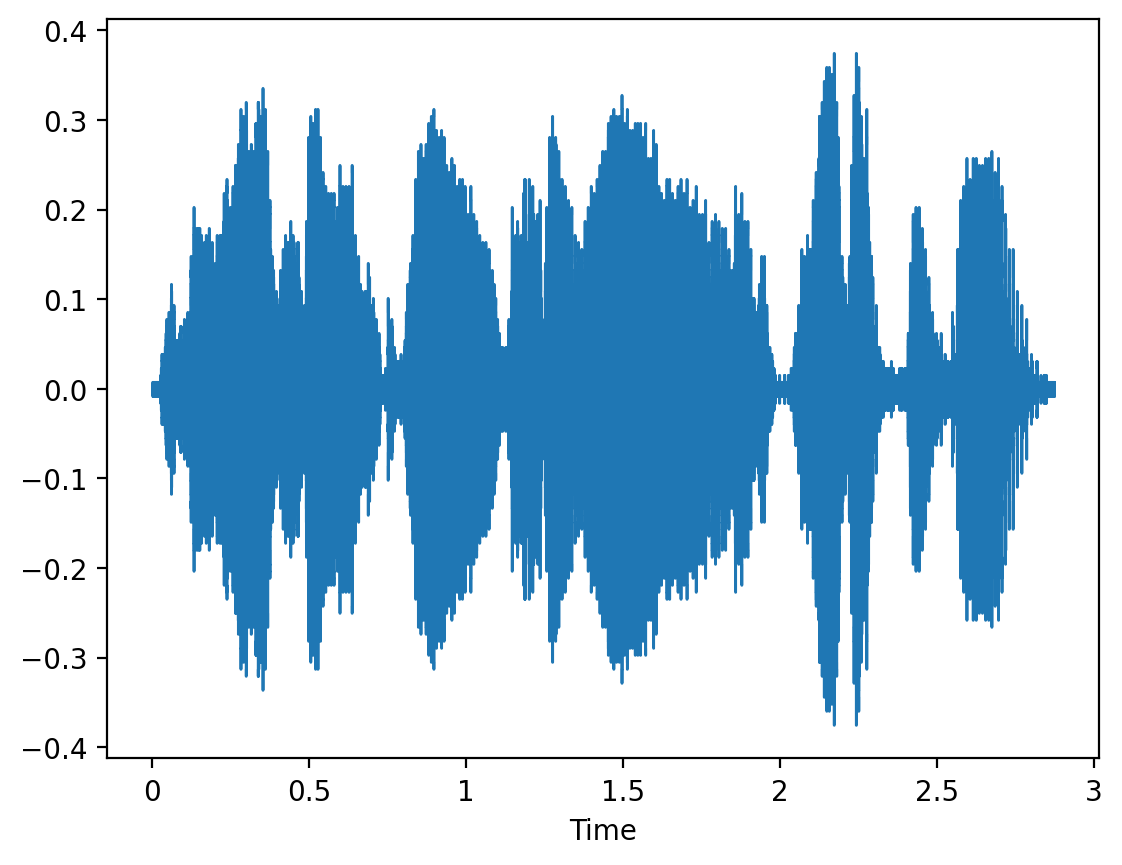

Reference text: THE OCEAN IS CALM AND SERENE ON THIS BEAUTIFUL DAY
ASR hypothesis: THE OCEAN IS A COMMON SURREN ON THIS BEAUTIFUL DAY
**************************************************
Input Speech: ESPNet_asr_egs/en/19.wav


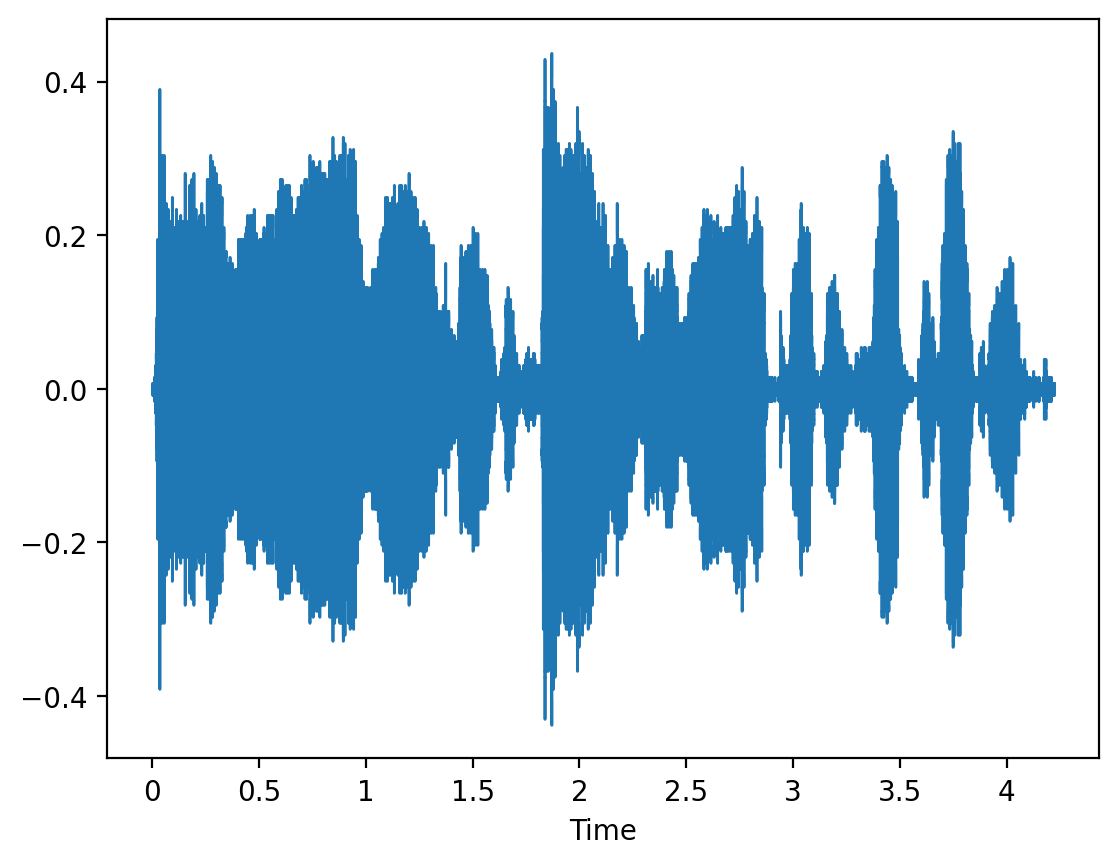

Reference text: IM WARMING MY HANDS BY THE FIRE AND ENJOYING A CUP OF HOT CHOCOLATE
ASR hypothesis: I AM WARMING MY HANDS BY THE FIRE AND ENJOYING THE CUP OF HOT CHOCOLATE
**************************************************
Input Speech: ESPNet_asr_egs/en/20.wav


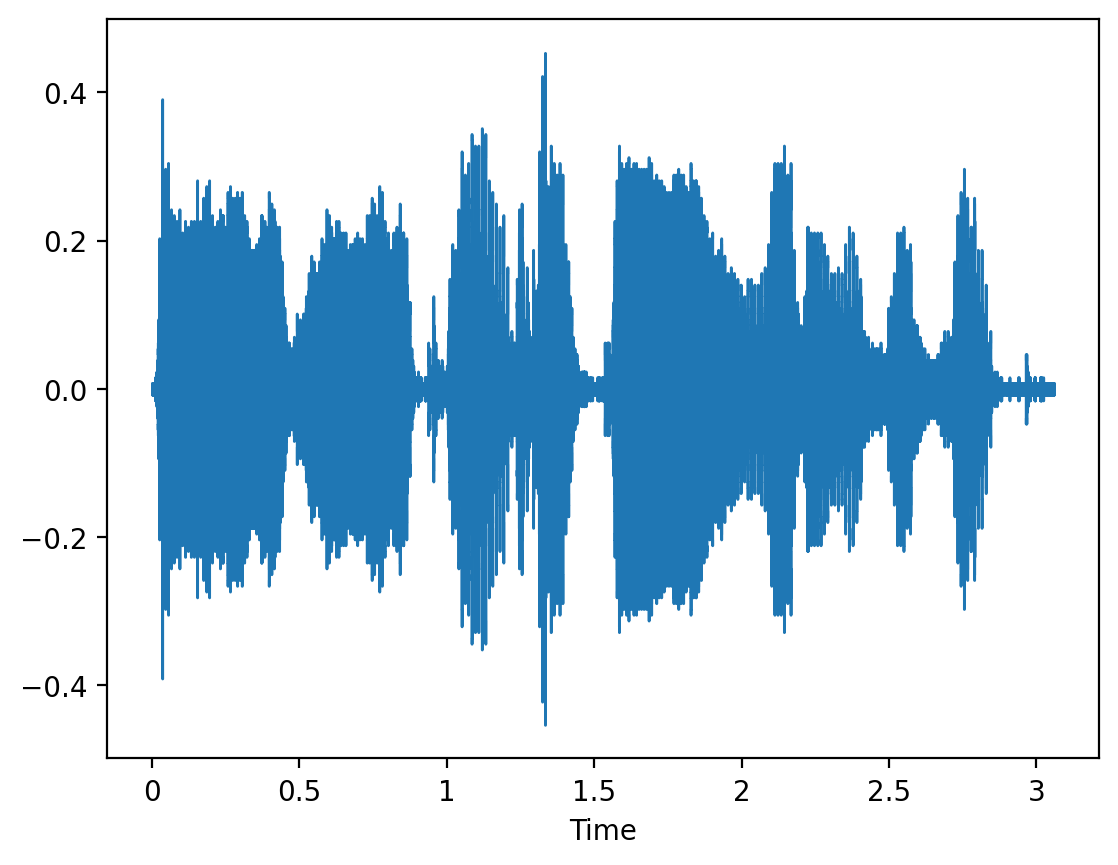

Reference text: IM ENJOYING A QUIET AFTERNOON READING A GOOD BOOK
ASR hypothesis: IM ENJOYING A QUIET AFTERNOON READING A GOOD BOOK
**************************************************
Input Speech: ESPNet_asr_egs/en/21.wav


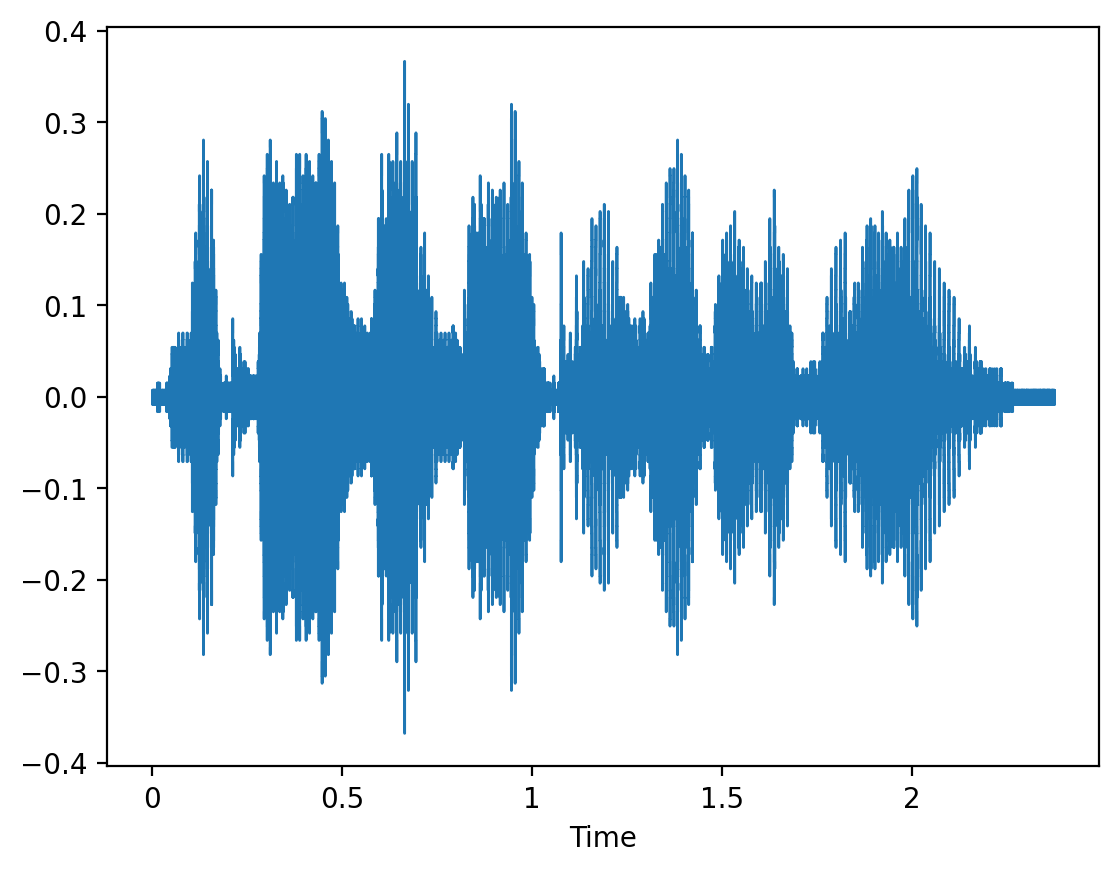

Reference text: THE CLOUDS ARE DARK AND HEAVY WITH RAIN
ASR hypothesis: THE CLOUDS ARE DARK AND HEAVY WITH RAIN
**************************************************
Input Speech: ESPNet_asr_egs/en/22.wav


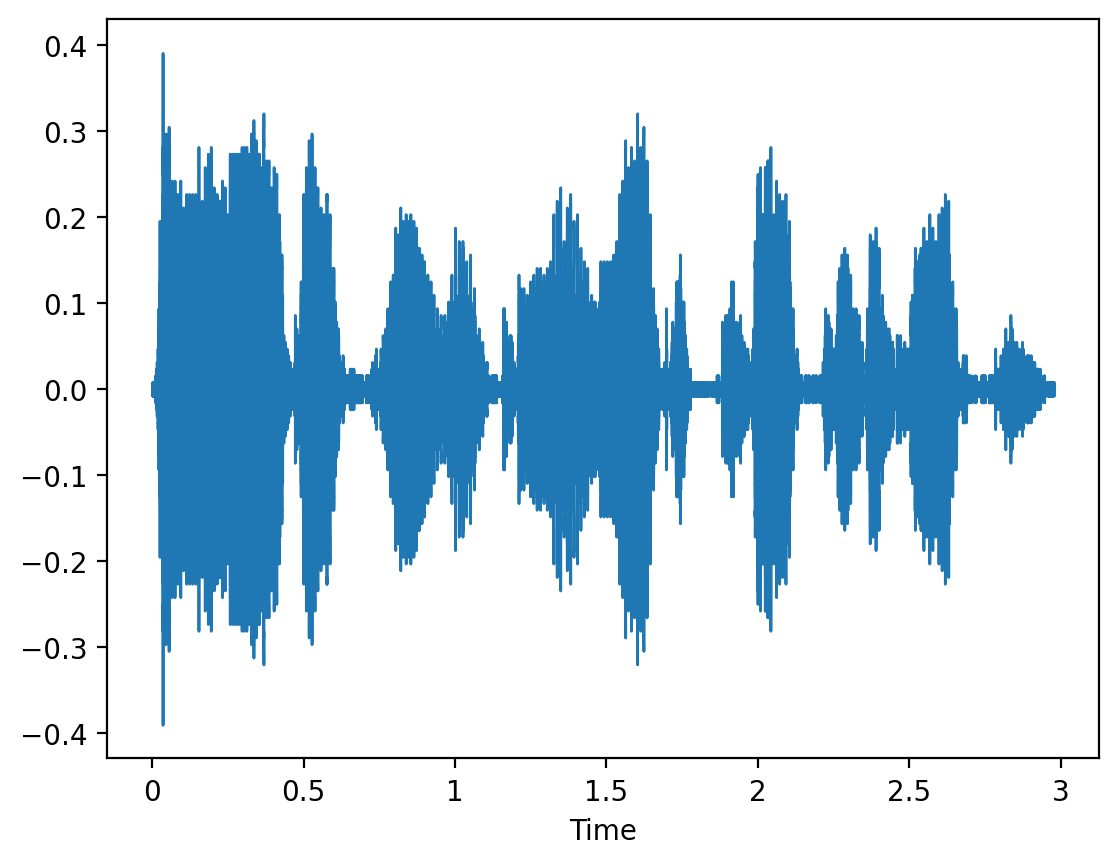

Reference text: IM LOOKING FORWARD TO MY NEXT TRIP TO THE BEACH
ASR hypothesis: I AM LOOKING FORWARD TO MY NEXT TRIP TO THE BEACH
**************************************************
Input Speech: ESPNet_asr_egs/en/23.wav


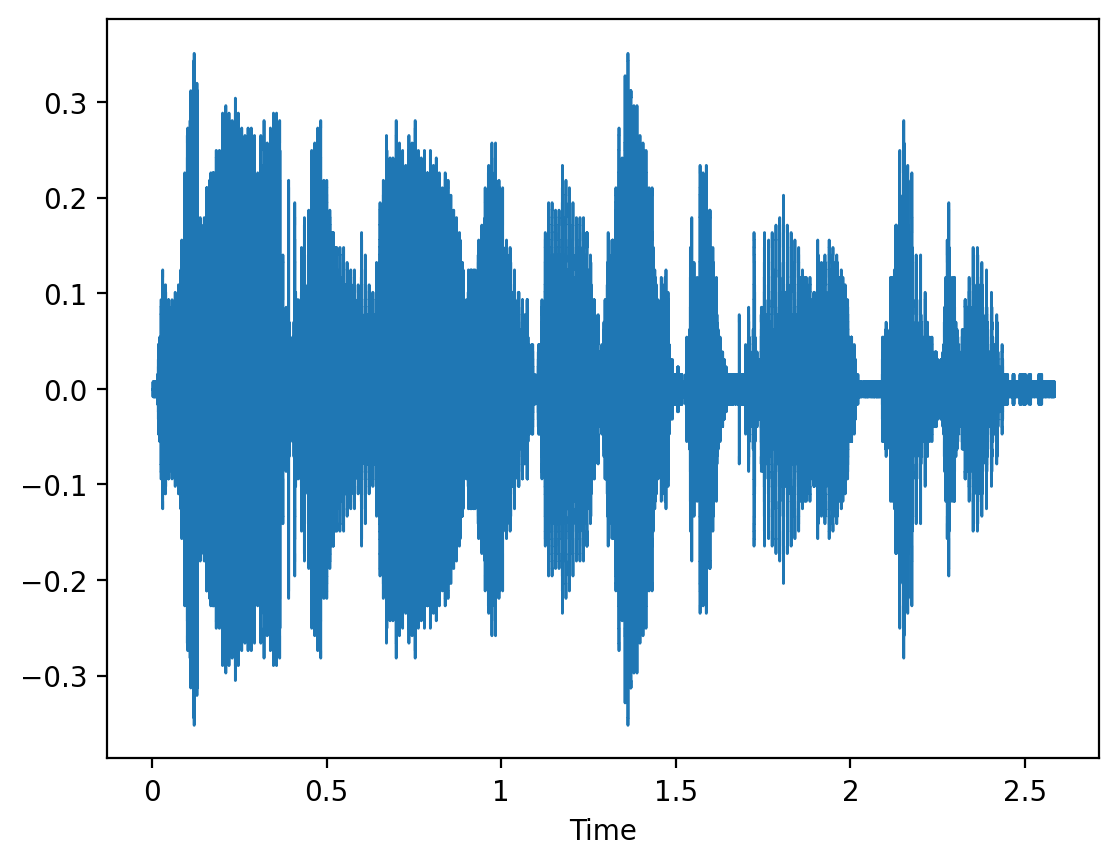

Reference text: THE MOUNTAIN RANGE IS MAJESTIC AND IMPRESSIVE
ASR hypothesis: THE MOUNTAIN RANGE IS MAGNESTIC AND IMPRESSIVE
**************************************************
Input Speech: ESPNet_asr_egs/en/24.wav


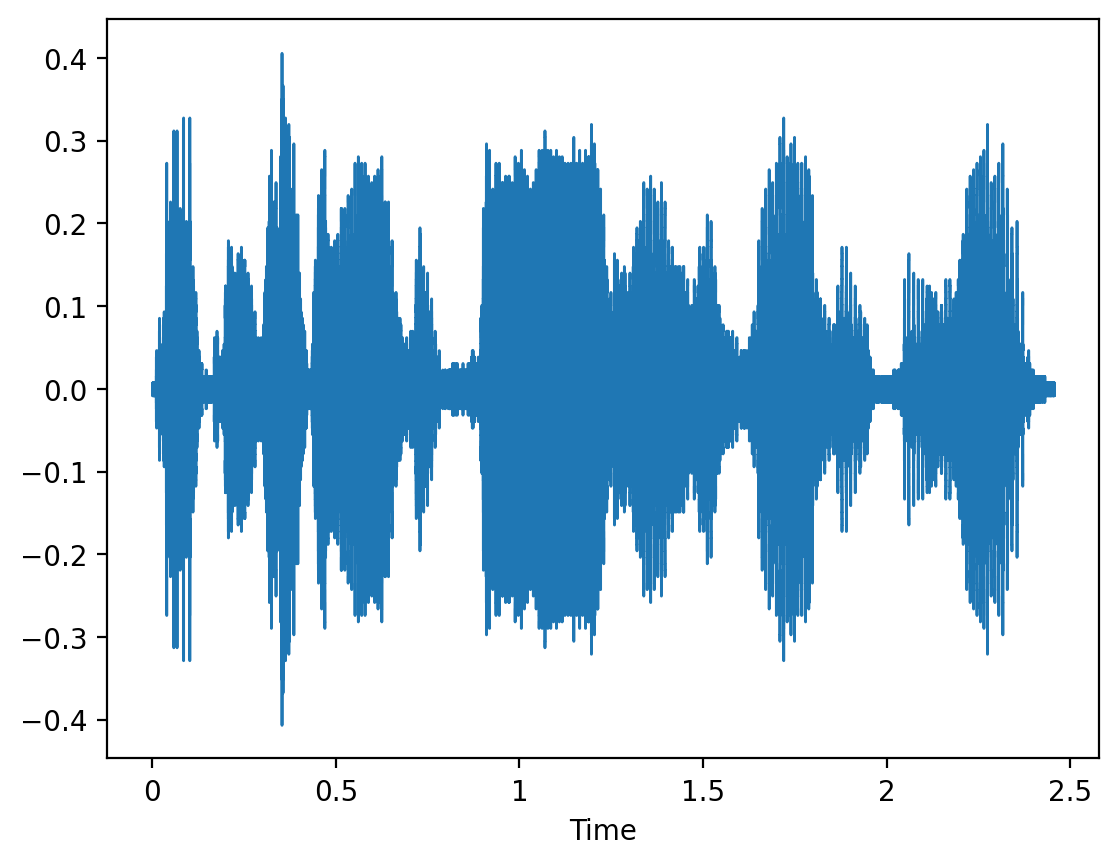

Reference text: I CAN SMELL THE FLOWERS IN THE GARDEN FROM HERE
ASR hypothesis: I CAN SMELL THE FLOWERS IN THE GARDEN FROM HERE
**************************************************
Input Speech: ESPNet_asr_egs/en/25.wav


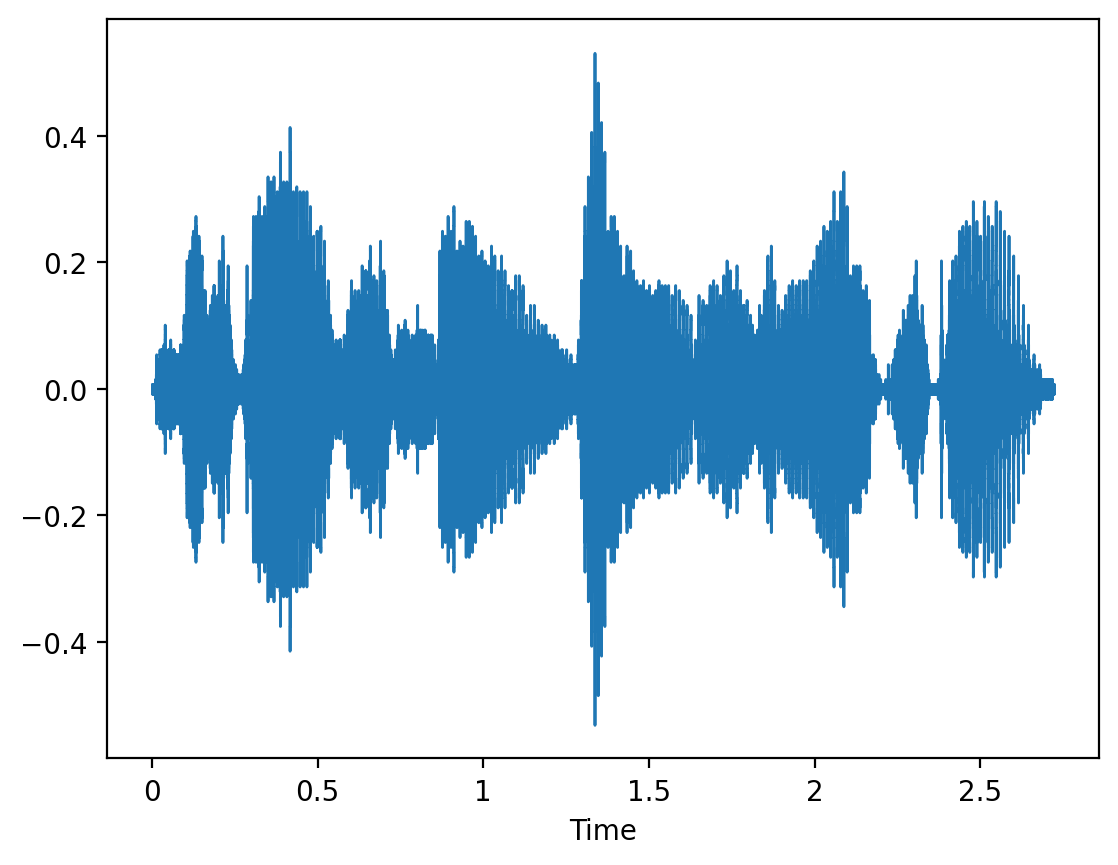

Reference text: THE STARS ARE SHINING BRIGHTLY IN THE NIGHT SKY
ASR hypothesis: THE STARS ARE SHINING BRIGHTENING IN THE NIGHT SKY
**************************************************
Input Speech: ESPNet_asr_egs/en/26.wav


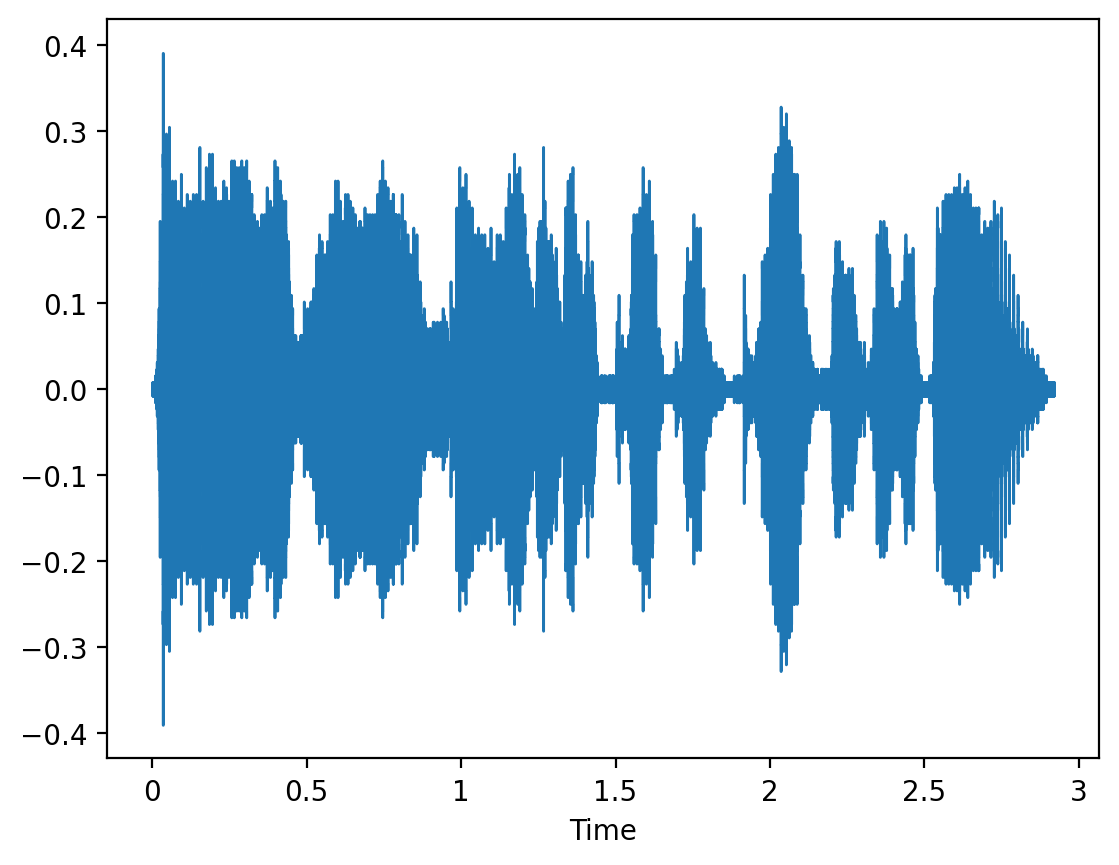

Reference text: IM ENJOYING A DELICIOUS CUP OF COFFEE THIS MORNING
ASR hypothesis: I AM ENJOYING A DELICIOUS CUP OF COFFEE THIS MORNING
**************************************************
Input Speech: ESPNet_asr_egs/en/27.wav


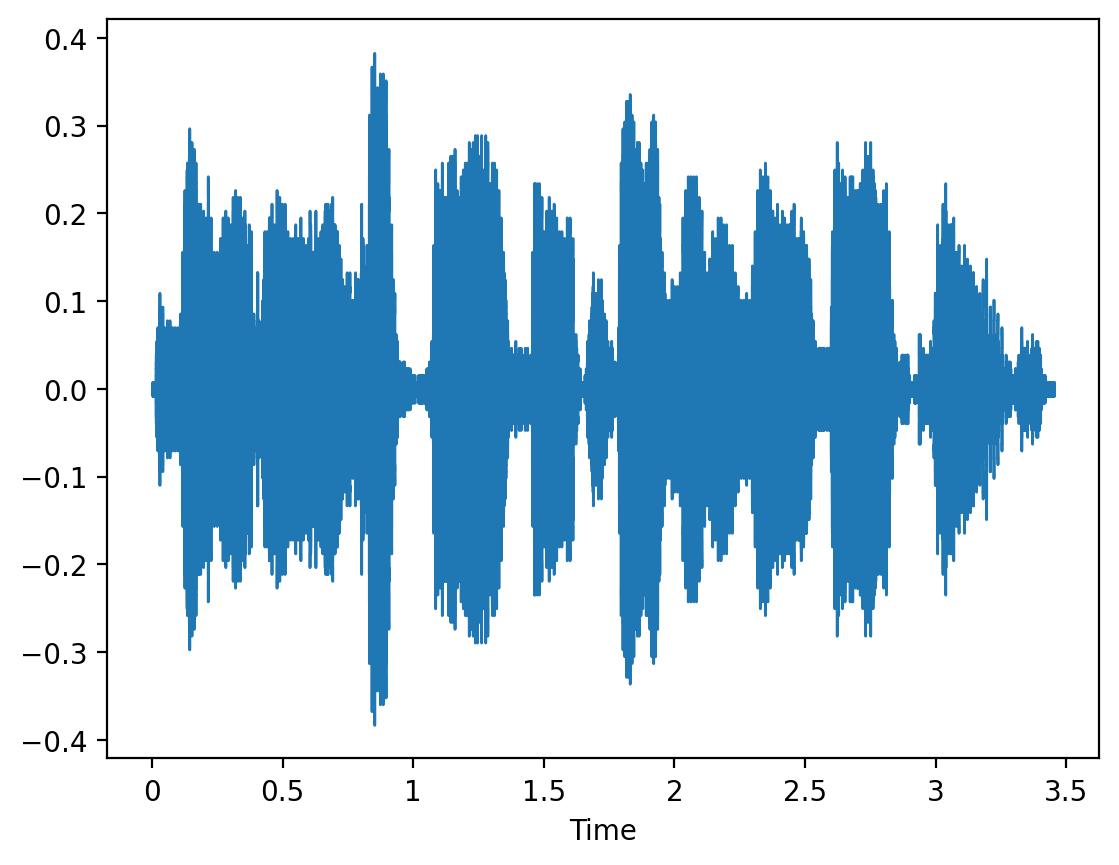

Reference text: THE AUTUMN LEAVES ARE FALLING FROM THE TREES IN A RAINBOW OF COLORS
ASR hypothesis: THE AUTUMN LEAPS ARE FALLING FROM THE TREES IN A RAINBOW OF COLORS
**************************************************
Input Speech: ESPNet_asr_egs/en/28.wav


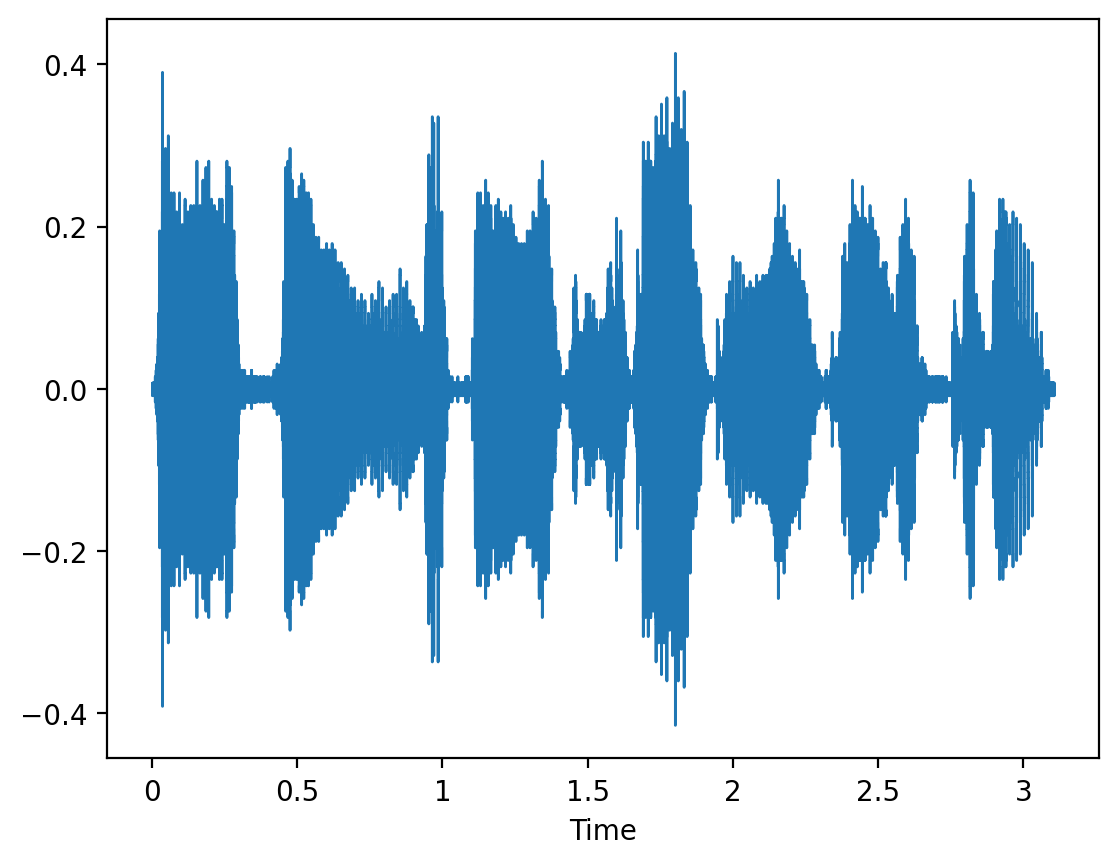

Reference text: IM FEELING INSPIRED TO START A NEW PROJECT TODAY
ASR hypothesis: I AM FEELING INSPIRED TO START A NEW PROJECT TODAY
**************************************************
Input Speech: ESPNet_asr_egs/en/29.wav


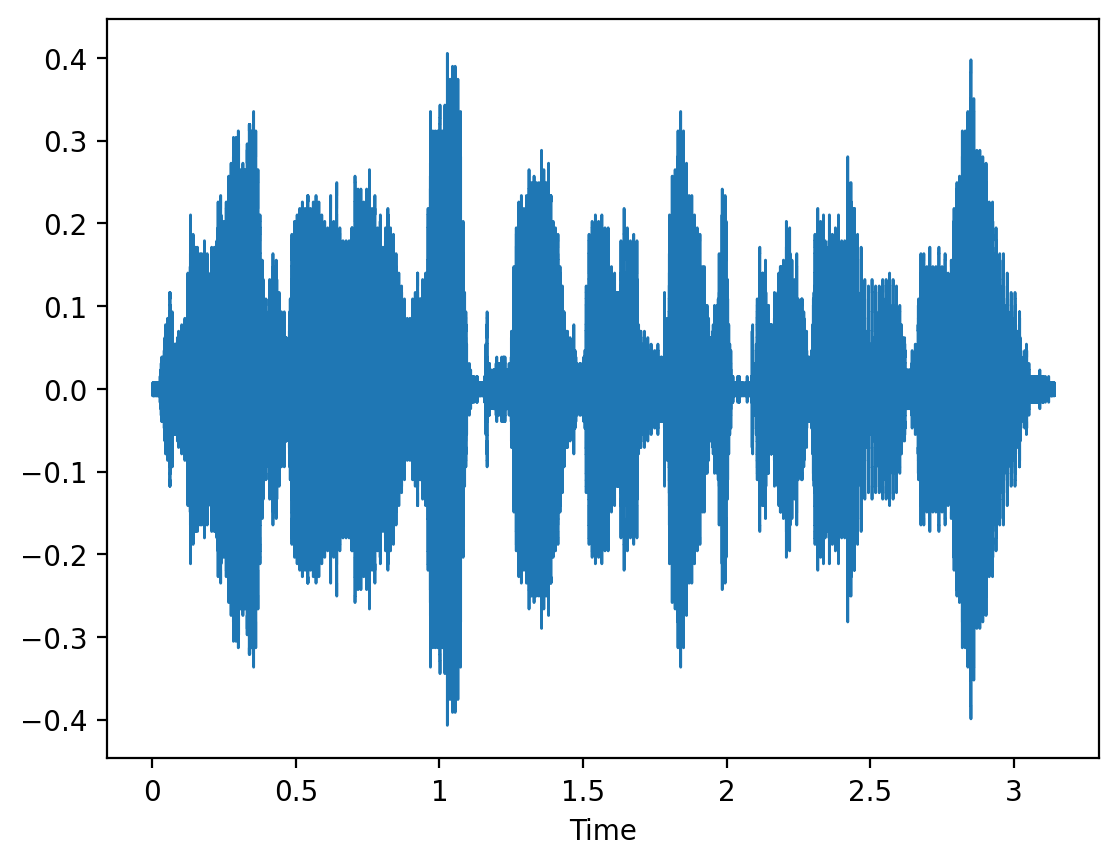

Reference text: THE OCEAN WAVES ARE CRASHING AGAINST THE SHORE WITH A ROAR
ASR hypothesis: THE OCEAN WAIVERS ARE CRASHING AGAINST THE SHORT BUT THEYRE ALL
**************************************************
Input Speech: ESPNet_asr_egs/en/30.wav


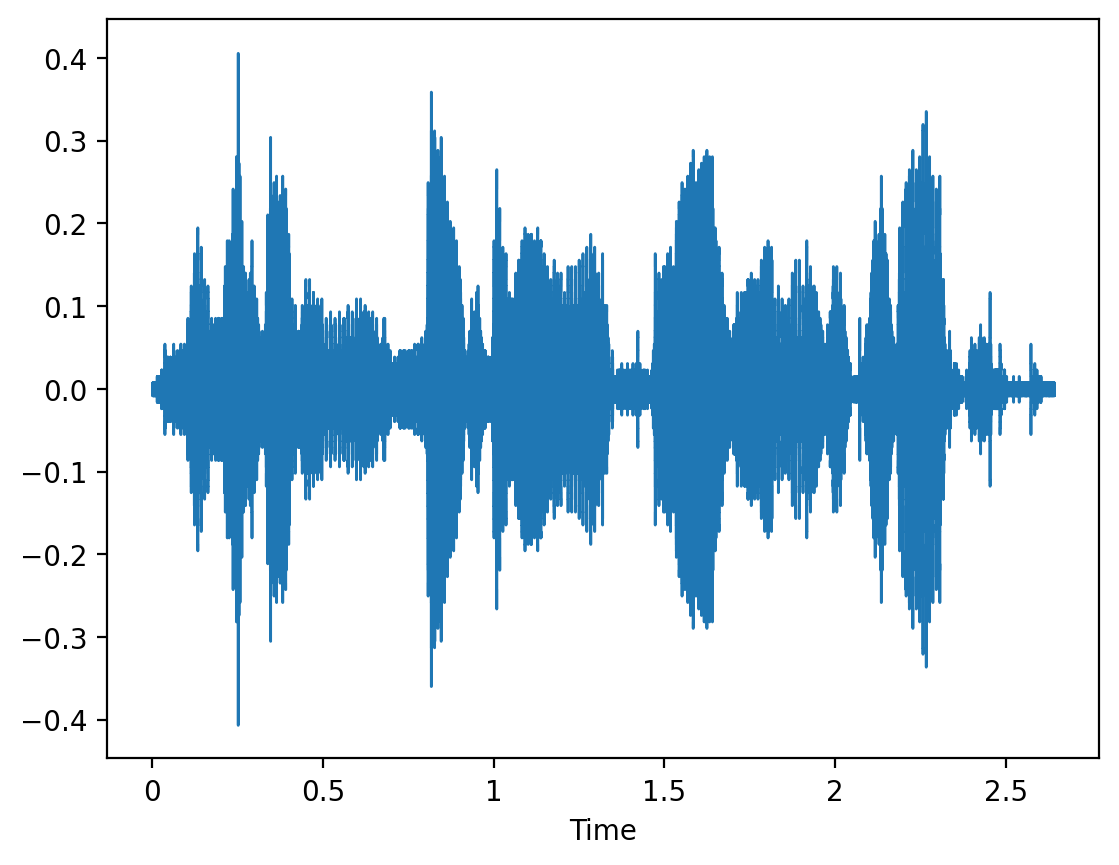

Reference text: THE CITY IS BUSTLING WITH ENERGY AND EXCITEMENT
ASR hypothesis: THE CITY IS BUSTLING WITH ENERGY AND EXCITEMENT
**************************************************


In [8]:
!git clone https://github.com/6322771351/NLP_speech.git

import pandas as pd
import soundfile
import librosa.display
from IPython.display import display, Audio
import matplotlib.pyplot as plt


egs = pd.read_csv("NLP_speech/esr.csv")
for index, row in egs.iterrows():
  if row["lang"] == lang or lang == "multilingual":
    speech, rate = soundfile.read("NLP_speech/" + row["path"])
    assert fs == int(row["sr"])
    nbests = speech2text(speech)

    text, *_ = nbests[0]
    print(f"Input Speech: ESPNet_asr_egs/{row['path']}")
    # let us listen to samples
    display(Audio(speech, rate=rate))
    #librosa.display.waveplot(speech, sr=rate)
    librosa.display.waveshow(speech, sr=rate)
    plt.show()
    print(f"Reference text: {text_normalizer(row['text'])}")
    print(f"ASR hypothesis: {text_normalizer(text)}")
    print("*" * 50)


##WER report

In [21]:
import pandas as pd
import soundfile

egs = pd.read_csv("NLP_speech/esr.csv")
with open('./Reference.txt', 'w') as ref_file, open('./Hypothesis.txt', 'w') as hyp_file:
    for index, row in egs.iterrows():
        if row["lang"] == lang or lang == "multilingual":
            speech, rate = soundfile.read("NLP_speech/" + row["path"])
            assert fs == int(row["sr"])
            nbests = speech2text(speech)
            text, *_ = nbests[0]
            ref_file.write(text_normalizer(row['text']) + "  (earth_" + str(index+1) + ")\n")
            hyp_file.write(text_normalizer(text) + "  (earth_" + str(index+1) + ")\n")

/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


In [22]:
!apt-get install -y sctk
!sctk sclite -r ./Reference.txt -h ./Hypothesis.txt -i spu_id
!sctk sclite -r ./Reference.txt -h ./Hypothesis.txt -i spu_id -o pra
!cat ./Hypothesis.txt.pra
!sctk sclite -r ./Reference.txt -h ./Hypothesis.txt -i spu_id -o dtl
!cat ./Hypothesis.txt.dtl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
sctk is already the newest version (2.4.10-20151007-1312Z+dfsg2-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
sclite: 2.10 TK Version 1.3
Begin alignment of Ref File: './Reference.txt' and Hyp File: './Hypothesis.txt'
    Alignment# 30 for speaker earth          




                     SYSTEM SUMMARY PERCENTAGES by SPEAKER                      

       ,----------------------------------------------------------------.
       |                        ./Hypothesis.txt                        |
       |----------------------------------------------------------------|
       | SPKR   | # Snt # Wrd | Corr    Sub    Del    Ins    Err  S.Err |
       |--------+-------------+-----------------------------------------|
       | earth  |   30    312 | 85.3   12.8    1.9    2.9   17.6   73.3 |
       |================================================================|
       | Sum/A